In [20]:
with open('./src/Hospitals.csv', 'r', encoding='utf-8-sig') as fichier:

    lignes = fichier.readlines()

liste_hopitaux = []

for ligne in lignes[1:]:
    elements = ligne.strip().split(',')
    hopital = {
        'nom': elements[0],
        'lits': int(elements[1]),  
        'adresse': elements[2],
        'contact': elements[3],
        'code': elements[4]
    }
    
    liste_hopitaux.append(hopital)

nombre_hopitaux = len(liste_hopitaux)
print(f"Nombre total d'hôpitaux répertoriés : {nombre_hopitaux}")

nombre_total_lits = sum(hopital['lits'] for hopital in liste_hopitaux)
print(f"Nombre total de lits : {nombre_total_lits}")

nombre_hopitaux_48207 = sum(1 for hopital in liste_hopitaux if hopital['code'] == '48207')
print(f"Nombre d'hôpitaux 48207 : {nombre_hopitaux_48207}")

nombre_lits_48201 = sum(hopital['lits'] for hopital in liste_hopitaux if hopital['code'] == '48201')
print(f"Nombre de lits 48201 : {nombre_lits_48201}")


Nombre total d'hôpitaux répertoriés : 7
Nombre total de lits : 3433
Nombre d'hôpitaux 48207 : 3
Nombre de lits 48201 : 639


Taille du texte en français (caractères) : 35974
Taille du texte en anglais (caractères) : 32837
Nombre de mots en français : 5986
Nombre de mots en anglais : 5754
Longueur moyenne des mots en français : 5.19 caractères
Longueur moyenne des mots en anglais : 4.83 caractères
Longueur moyenne des phrases en français : 25.00 mots / 152.88 caractères
Longueur moyenne des phrases en anglais : 25.01 mots / 143.75 caractères

Mots les plus fréquents en français :
de : 319
la : 230
le : 138
et : 109
à : 109
que : 104
en : 93
des : 83
les : 82
nous : 79

Mots les plus fréquents en anglais :
the : 374
of : 202
to : 194
in : 121
and : 120
a : 109
I : 99
is : 95
that : 92
this : 84


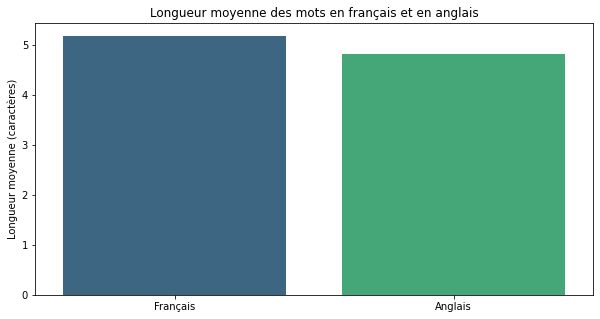

Nombre de phrases en français : 239
Nombre de phrases en anglais : 230


In [15]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

with open('./src/europarl_fr.txt', 'r', encoding='utf-8') as f_fr:
    texte_fr = f_fr.read()

with open('./src/europarl_en.txt', 'r', encoding='utf-8') as f_en:
    texte_en = f_en.read()


def pretraitement_texte(texte):
    #mettre en minuscule
    texte = texte.lower()
    #supp la ponctuation
    texte = re.sub(r'[^\w\s]', '', texte)
    return texte


texte_fr2 = texte_fr
texte_en2 = texte_en
texte_fr = pretraitement_texte(texte_fr)
texte_en = pretraitement_texte(texte_en)


def diviser_mots_phrases(texte):
    #split en mots
    mots = texte.split()
    #si toutes les phrase finissent par des points c'est bon
    phrases = re.split(r'[.!?]', texte)
    #si phrase vide on delete
    phrases = [phrase.strip() for phrase in phrases if phrase]
    
    return mots, phrases

mots_fr, phrases_fr = diviser_mots_phrases(texte_fr2)
mots_en, phrases_en = diviser_mots_phrases(texte_en2)


taille_caracteres_fr = len(texte_fr)
taille_caracteres_en = len(texte_en)

taille_mots_fr = len(mots_fr)
taille_mots_en = len(mots_en)

#taille des textes 
print(f"Taille du texte en français (caractères) : {taille_caracteres_fr}")
print(f"Taille du texte en anglais (caractères) : {taille_caracteres_en}")
print(f"Nombre de mots en français : {taille_mots_fr}")
print(f"Nombre de mots en anglais : {taille_mots_en}")

longueur_moy_mots_fr = sum(len(mot) for mot in mots_fr) / taille_mots_fr
longueur_moy_mots_en = sum(len(mot) for mot in mots_en) / taille_mots_en

print(f"Longueur moyenne des mots en français : {longueur_moy_mots_fr:.2f} caractères")
print(f"Longueur moyenne des mots en anglais : {longueur_moy_mots_en:.2f} caractères")

# 3. Longueur moyenne des phrases en mots et en caractères
longueur_moy_phrases_fr_mots = sum(len(phrase.split()) for phrase in phrases_fr) / len(phrases_fr)
longueur_moy_phrases_en_mots = sum(len(phrase.split()) for phrase in phrases_en) / len(phrases_en)

longueur_moy_phrases_fr_caracteres = sum(len(phrase) for phrase in phrases_fr) / len(phrases_fr)
longueur_moy_phrases_en_caracteres = sum(len(phrase) for phrase in phrases_en) / len(phrases_en)

print(f"Longueur moyenne des phrases en français : {longueur_moy_phrases_fr_mots:.2f} mots / {longueur_moy_phrases_fr_caracteres:.2f} caractères")
print(f"Longueur moyenne des phrases en anglais : {longueur_moy_phrases_en_mots:.2f} mots / {longueur_moy_phrases_en_caracteres:.2f} caractères")

# 4. Mots fréquents
freq_mots_fr = Counter(mots_fr)
freq_mots_en = Counter(mots_en)

# les 10 mots les plus fréquents pour chaque langue
mots_freq_fr = freq_mots_fr.most_common(10)
mots_freq_en = freq_mots_en.most_common(10)

print("\nMots les plus fréquents en français :")
for mot, freq in mots_freq_fr:
    print(f"{mot} : {freq}")

print("\nMots les plus fréquents en anglais :")
for mot, freq in mots_freq_en:
    print(f"{mot} : {freq}")

# 5.Visualisation avec matplotlib et seaborn

# Longueur moyenne des mots
plt.figure(figsize=(10, 5))
sns.barplot(x=["Français", "Anglais"], y=[longueur_moy_mots_fr, longueur_moy_mots_en], palette="viridis")
plt.title("Longueur moyenne des mots en français et en anglais")
plt.ylabel("Longueur moyenne (caractères)")
plt.show()
print(f"Nombre de phrases en français : {len(phrases_fr)}")
print(f"Nombre de phrases en anglais : {len(phrases_en)}")

